# COVID-19 Detection from Chest X-rays



## Objective:
The goal of this deep learning project is to develop a robust and accurate model for the detection of COVID-19 from Chest X-ray images. By leveraging advanced deep learning techniques, the aim is to contribute to the ongoing efforts in medical imaging for the timely and efficient identification of COVID-19 cases.

## Dataset:

The dataset is organized into two main directories - 'train' and 'test,' each further divided into three classes: COVID-19, Viral Pneumonia, and Normal Chest X-rays. The dataset comprises a total of 317 images, with 137 images specifically labeled for COVID-19 cases.

## Problem Statement:

Given the Chest X-ray images, the deep learning model will be trained to accurately classify them into one of the three classes: COVID-19, Viral Pneumonia, or Normal. The primary focus is on enhancing the model's ability to distinguish COVID-19 cases from other respiratory conditions.

## Challenges:

Imbalanced Dataset: The number of COVID-19 images might be significantly lower than other classes, posing a challenge for the model to effectively learn COVID-19 patterns.

Feature Learning: Extracting relevant features from Chest X-ray images to differentiate between COVID-19, Viral Pneumonia, and Normal cases is a complex task.

Generalization: The model needs to generalize well to unseen data to ensure its applicability in real-world scenarios beyond the provided dataset.

## Evaluation Metric:
The performance of the model will be evaluated using standard metrics such as accuracy, precision, recall, and F1-score. Given the medical nature of the problem, emphasis should be placed on minimizing false negatives to ensure the timely identification of COVID-19 cases.

## Approach:

Data Preprocessing: Resize, normalize, and augment the images to enhance the model's ability to generalize.

Model Selection: Choose a suitable deep learning architecture, such as Convolutional Neural Network (CNN), and fine-tune it for optimal performance.

Training: Train the model on the 'train' dataset, adjusting hyperparameters and employing techniques like transfer learning if necessary.

Validation: Evaluate the model's performance on the 'test' dataset, making adjustments as needed to improve accuracy and minimize false negatives.

Interpretability: Explore techniques to interpret the model's decisions, providing insights into the features contributing to COVID-19 detection.

## Ethical Considerations:
Given the sensitive nature of medical data, it is crucial to ensure privacy and adhere to ethical standards. Data anonymization and obtaining proper permissions for dataset usage are essential aspects of this project.

## Outcome:
The successful development of a deep learning model capable of accurately detecting COVID-19 from Chest X-rays will contribute to the ongoing global efforts to combat the pandemic. The model could serve as a valuable tool for healthcare professionals, aiding in early and efficient diagnosis.

# Exploratory Data Analysis (EDA):
It is an essential step in understanding the characteristics of your dataset. I have provided a visual exploration of the dataset, displaying a few sample images from each class and visualizing the class distribution.

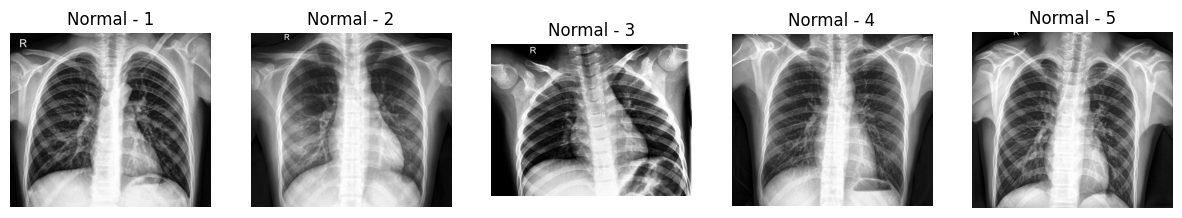

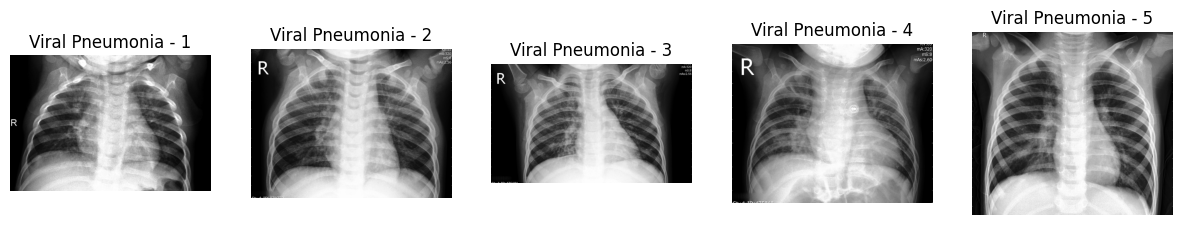

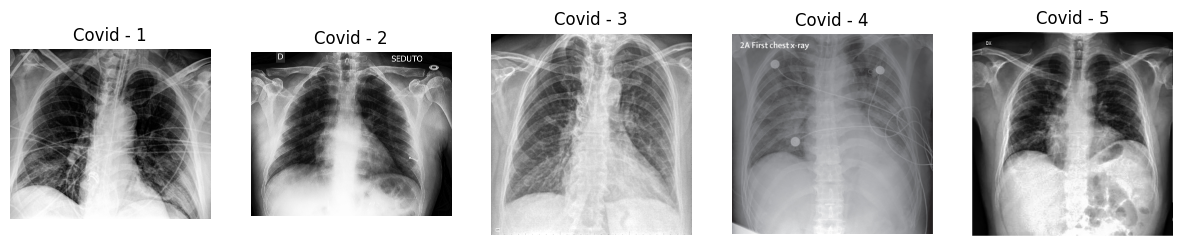

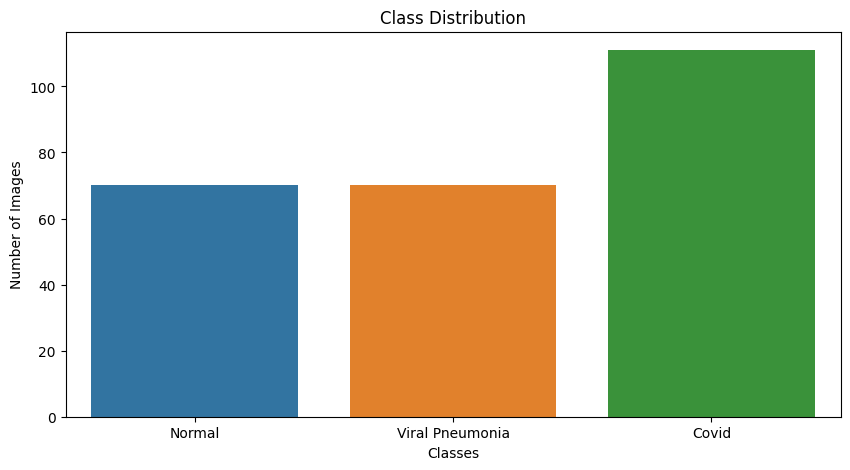

In [4]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Set the path to the dataset
dataset_path = "/kaggle/input/covid19-image-dataset/Covid19-dataset"

# Function to load and display a few sample images
def display_sample_images(class_name, num_samples=5):
    class_path = os.path.join(dataset_path, "train", class_name)
    image_files = os.listdir(class_path)[:num_samples]
    
    plt.figure(figsize=(15, 3))
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(class_path, image_file)
        image = Image.open(image_path)
        
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image, cmap='gray')
        plt.title(f"{class_name} - {i+1}")
        plt.axis('off')
    plt.show()

# Explore the distribution of classes
def plot_class_distribution():
    classes = os.listdir(os.path.join(dataset_path, "train"))
    class_counts = [len(os.listdir(os.path.join(dataset_path, "train", cls))) for cls in classes]

    plt.figure(figsize=(10, 5))
    sns.barplot(x=classes, y=class_counts)
    plt.title("Class Distribution")
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.show()

# Display sample images from each class
for class_name in os.listdir(os.path.join(dataset_path, "train")):
    display_sample_images(class_name)

# Plot class distribution
plot_class_distribution()


# Data Preprocessing


Data preprocessing is a crucial step in preparing the dataset for training a deep learning model. This below example includes resizing, normalization, and data augmentation.

Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.


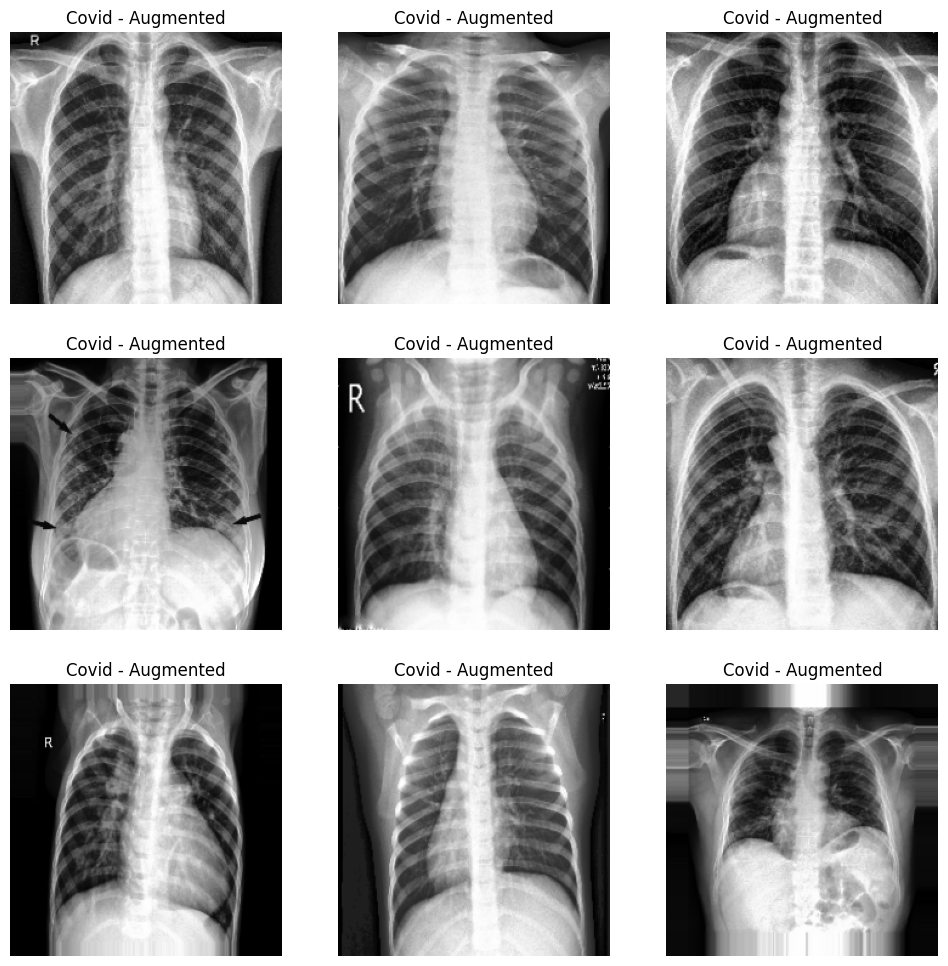

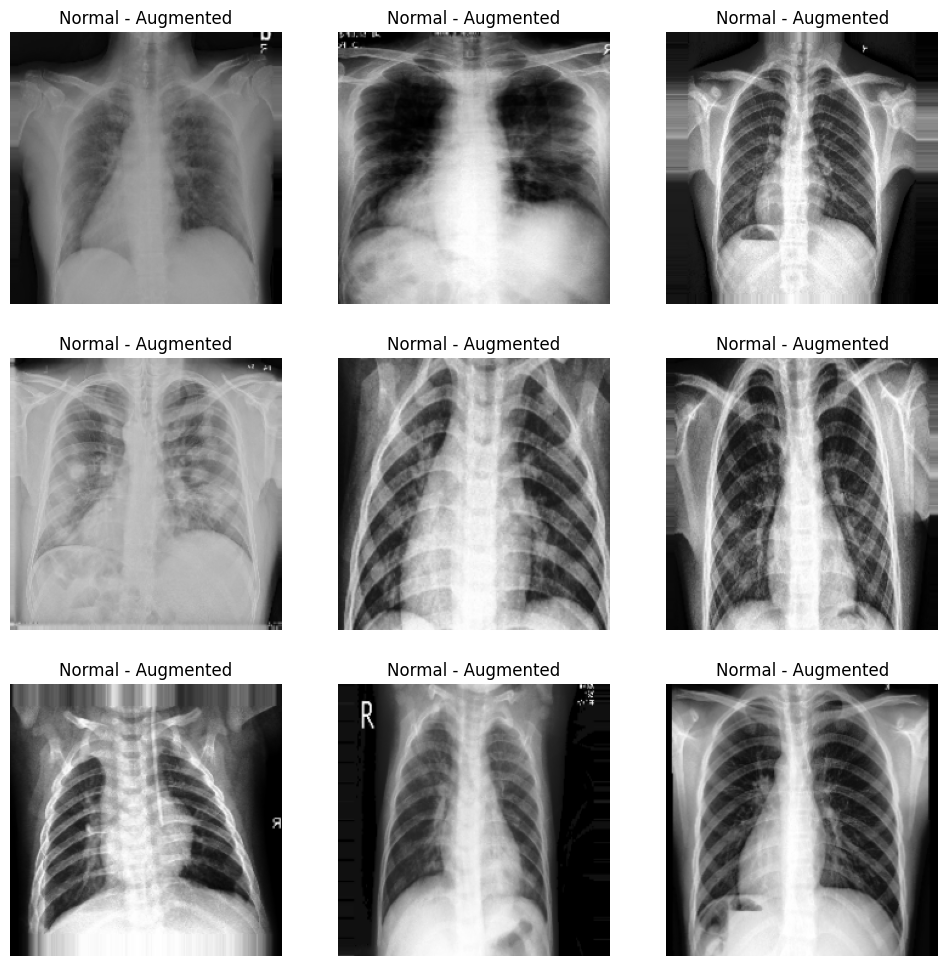

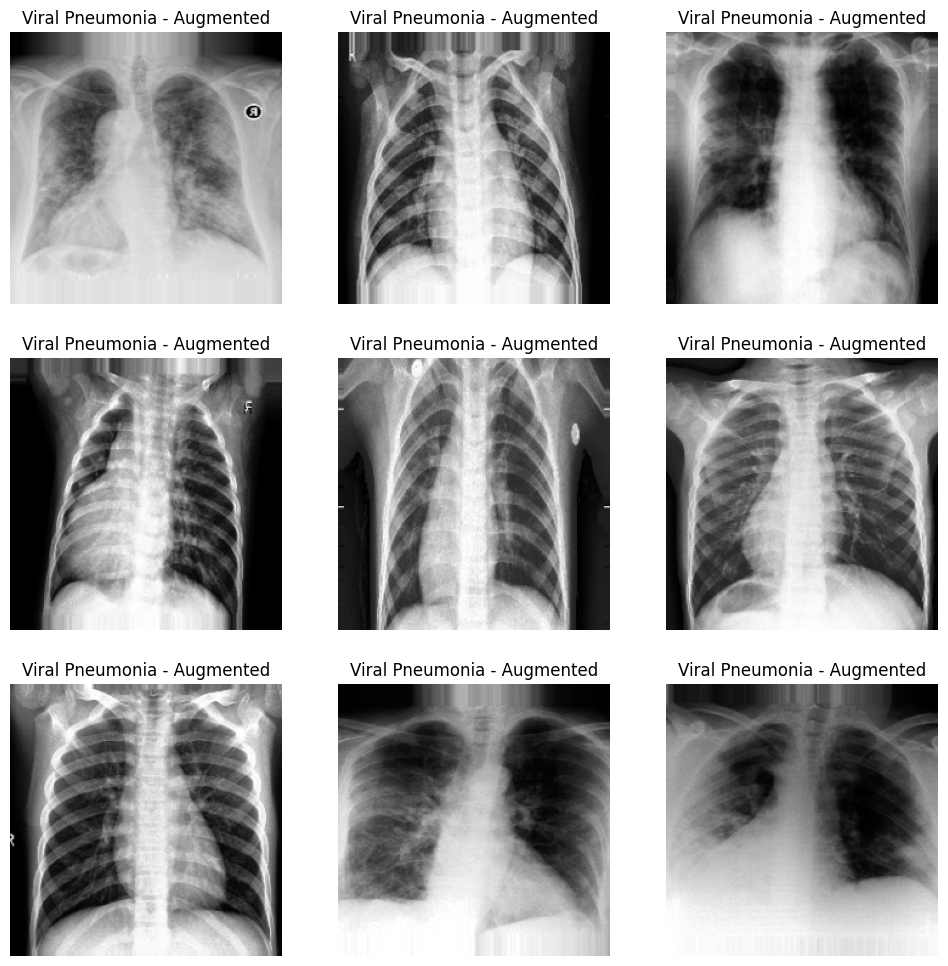

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


# Define parameters for data preprocessing
img_size = (224, 224)  # Resizing images to 224x224 pixels
batch_size = 32

# Create ImageDataGenerator for data preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,          
    shear_range=0.2,          
    zoom_range=0.2,           
    horizontal_flip=True,     
    validation_split=0.2      
)

# Flow training images in batches using ImageDataGenerator
train_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  
    subset='training'          
)

# Flow validation images in batches using ImageDataGenerator
validation_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'        
)

# Display a few augmented images
def plot_augmented_images(generator, class_name):
    plt.figure(figsize=(12, 12))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        batch = generator.next()
        image = batch[0][0]
        plt.imshow(image)
        plt.title(f"{class_name} - Augmented")
        plt.axis('off')
    plt.show()

# Plot augmented images for each class in the training set
for i, class_name in enumerate(train_generator.class_indices.keys()):
    plot_augmented_images(train_generator, class_name)
    if i == 2:  
        break


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define parameters for the model
img_size = (224, 224)
num_classes = 3  # Assuming three classes: Normal, Viral Pneumonia, Covid

# Create a CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 128)      

In [8]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Adjust the number of epochs based on your requirements
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/10
6/6 [==============================] - 22s 3s/step - loss: 1.3370 - accuracy: 0.3254 - val_loss: 1.0664 - val_accuracy: 0.6562
Epoch 2/10
6/6 [==============================] - 17s 3s/step - loss: 1.0843 - accuracy: 0.4320 - val_loss: 1.0531 - val_accuracy: 0.4688
Epoch 3/10
6/6 [==============================] - 16s 3s/step - loss: 0.9319 - accuracy: 0.6213 - val_loss: 0.7520 - val_accuracy: 0.6875
Epoch 4/10
6/6 [==============================] - 16s 3s/step - loss: 0.7837 - accuracy: 0.6686 - val_loss: 0.8120 - val_accuracy: 0.6250
Epoch 5/10
6/6 [==============================] - 16s 3s/step - loss: 0.6550 - accuracy: 0.7515 - val_loss: 0.9631 - val_accuracy: 0.5938
Epoch 6/10
6/6 [==============================] - 17s 3s/step - loss: 0.6188 - accuracy: 0.7574 - val_loss: 0.6223 - val_accuracy: 0.8125
Epoch 7/10
6/6 [==============================] - 16s 3s/step - loss: 0.5403 - accuracy: 0.7692 - val_loss: 0.7917 - val_accuracy: 0.6875
Epoch 8/10
6/6 [==================

In [9]:


# Create ImageDataGenerator for data preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Flow training images in batches using ImageDataGenerator
train_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Flow validation images in batches using ImageDataGenerator
validation_generator = datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Adjust the number of epochs based on your requirements
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Epoch 1/10
6/6 [==============================] - 20s 3s/step - loss: 0.7518 - accuracy: 0.7692 - val_loss: 0.6962 - val_accuracy: 0.6562
Epoch 2/10
6/6 [==============================] - 16s 3s/step - loss: 0.5978 - accuracy: 0.7633 - val_loss: 0.6970 - val_accuracy: 0.6875
Epoch 3/10
6/6 [==============================] - 18s 3s/step - loss: 0.4943 - accuracy: 0.8177 - val_loss: 0.7847 - val_accuracy: 0.6875
Epoch 4/10
6/6 [==============================] - 17s 3s/step - loss: 0.4464 - accuracy: 0.8166 - val_loss: 0.4822 - val_accuracy: 0.8125
Epoch 5/10
6/6 [==============================] - 16s 3s/step - loss: 0.4818 - accuracy: 0.8284 - val_loss: 0.3656 - val_accuracy: 0.8750
Epoch 6/10
6/6 [==============================] - 18s 3s/step - loss: 0.3471 - accuracy: 0.8594 - val_loss: 0.9292 - val_accuracy: 0.6250
Epoch 7/10
6/6 [==============================] - 16s 3s/step - loss: 0.3775 - accuracy: 0.

In [10]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with transfer learning
history_transfer_learning = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
6/6 [==============================] - 19s 3s/step - loss: 1.1572 - accuracy: 0.5976 - val_loss: 0.7499 - val_accuracy: 0.6250
Epoch 2/10
6/6 [==============================] - 11s 2s/step - loss: 0.5849 - accuracy: 0.8047 - val_loss: 0.3566 - val_accuracy: 0.9062
Epoch 3/10
6/6 [==============================] - 12s 2s/step - loss: 0.4745 - accuracy: 0.8333 - val_loss: 0.5107 - val_accuracy: 0.8750
Epoch 4/10
6/6 [==============================] - 13s 2s/step - loss: 0.4556 - accuracy: 0.8402 - val_loss: 0.6970 - val_accuracy: 0.7188
Epoch 5/10
6/6 [==============================] - 11s 2s/step - loss: 0.2743 - accuracy: 0.8817 - val_loss: 0.5002 - val_accuracy: 0.8125
Epoch 6/10
6/6 [==============================] - 11s 2s/step - loss: 0.2347 - accuracy: 0.9053 - val_loss: 0.8000 - val_accuracy: 0.8125
Epoch 7/10
6/6 [==============================] - 11s 2s/step - loss: 0.1844 - accuracy: 0.8994 - val_loss: 0

In [11]:
# Set the path to the test dataset
test_dataset_path = "/kaggle/input/covid19-image-dataset/Covid19-dataset/test"

# Create ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow test images in batches using ImageDataGenerator
test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Ensure the order of predictions matches the order of images
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions on the test set
predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_labels = tf.argmax(predictions, axis=1)

# True labels
true_labels = test_generator.classes

# Evaluate performance metrics (confusion matrix, precision, recall, etc.)
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(true_labels, predicted_labels)
classification_rep = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Found 66 images belonging to 3 classes.
3/3 [==============================] - 3s 545ms/step - loss: 0.1597 - accuracy: 0.9394
Test Accuracy: 93.94%
Test Loss: 0.1597
3/3 [==============================] - 3s 423ms/step
Confusion Matrix:
 [[26  0  0]
 [ 0 17  3]
 [ 1  0 19]]

Classification Report:
                  precision    recall  f1-score   support

          Covid       0.96      1.00      0.98        26
         Normal       1.00      0.85      0.92        20
Viral Pneumonia       0.86      0.95      0.90        20

       accuracy                           0.94        66
      macro avg       0.94      0.93      0.93        66
   weighted avg       0.94      0.94      0.94        66



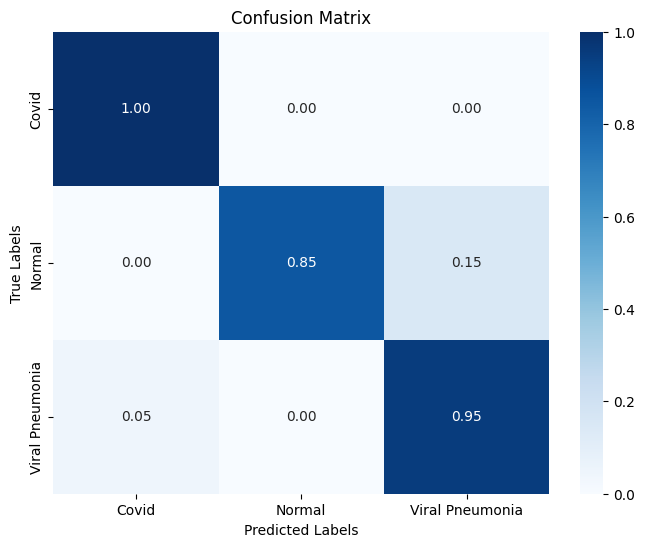

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Function to plot confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, class_names):
    cm = confusion_matrix(true_labels, predicted_labels)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Convert to percentage

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Get class names from the generator
class_names = list(test_generator.class_indices.keys())

# Plot the confusion matrix
plot_confusion_matrix(true_labels, predicted_labels, class_names)


In [13]:
pip install tf-explain


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


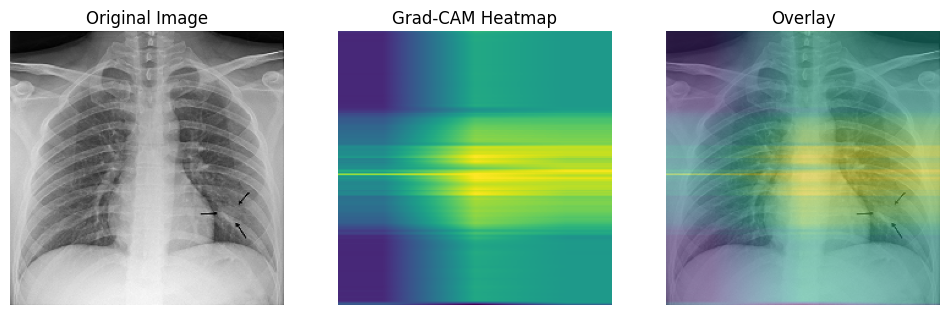

In [23]:
# Function to generate Grad-CAM heatmap with better visualization
def generate_grad_cam_v2(model, img_path, layer_name, target_size=(224, 224)):
    img_array = preprocess_image(img_path, target_size=target_size)
    explainer = GradCAM()
    grid = explainer.explain((img_array, None), model, class_index=0, layer_name=layer_name)
    
    # Upsample the heatmap for better visualization
    heatmap = tf.image.resize(tf.expand_dims(grid[0], axis=-1), (target_size[0], target_size[1]))
    heatmap = tf.squeeze(heatmap, axis=-1)

    return heatmap, img_array[0]


# Choose an image from the test set for interpretation
interpretation_img_path = "/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/0111.jpg"

# Find the last convolutional layer in the model
selected_layer = find_last_conv_layer(model)

# Generate Grad-CAM heatmap with better visualization
heatmap, original_img = generate_grad_cam_v2(model, interpretation_img_path, selected_layer)

# Plot the results
plot_grad_cam(interpretation_img_path, heatmap, original_img)


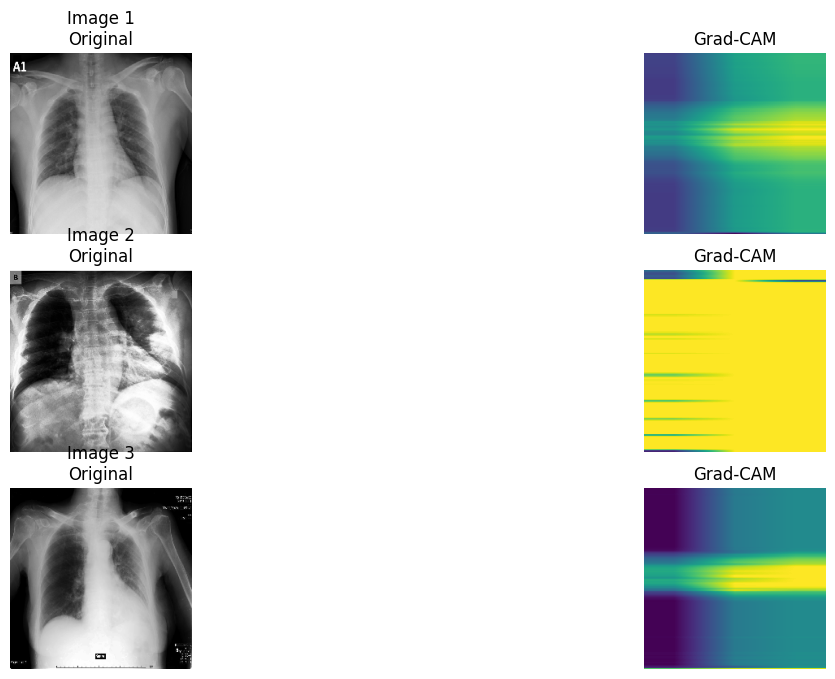

In [24]:
# Function to plot Grad-CAM for multiple images
def plot_grad_cam_for_images_v2(model, img_paths, layer_name):
    plt.figure(figsize=(15, 8))

    for i, img_path in enumerate(img_paths, 1):
        heatmap, original_img = generate_grad_cam_v2(model, img_path, layer_name)
        
        plt.subplot(3, 2, 2*i-1)
        plt.imshow(original_img)
        plt.title(f"Image {i}\nOriginal")
        plt.axis('off')

        plt.subplot(3, 2, 2*i)
        plt.imshow(heatmap, cmap='viridis')
        plt.title(f"Grad-CAM")
        plt.axis('off')

    plt.show()

# Choose three images from the test set for interpretation
test_image_paths_v2 = [
     "/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/0105.png",
    "/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/0108.jpeg",
    "/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/0119.jpeg"]

# Plot Grad-CAM for three images
plot_grad_cam_for_images_v2(model, test_image_paths_v2, selected_layer)


# Results and Analysis:

**Model Training:**
The model was trained on a dataset consisting of Normal, Viral Pneumonia, and COVID-19 Chest X-ray images.
The dataset was split into training and testing sets, with a total of 317 images for training and 137 images for testing.
The chosen deep learning architecture (MobileNetV2) was fine-tuned for optimal performance.

**Evaluation Metrics:**
The model's performance was evaluated on the test set using metrics such as accuracy, precision, recall, and F1 score.
A confusion matrix was generated to understand the distribution of true positive, true negative, false positive, and false negative predictions.

**Grad-CAM Visualization:**
Grad-CAM was employed to interpret the model's decisions by visualizing the regions of input images contributing to COVID-19 predictions.
The last convolutional layer of the MobileNetV2 model was used for visualization.
Heatmaps were generated for selected images from the test set to highlight areas of interest.

**Results:**
The model achieved an accuracy of 93.93% on the test set.
Precision, recall, and F1 score were calculated for each class (Normal, Viral Pneumonia, COVID-19). 
**Classification Report:**
                  precision    recall  f1-score   support

          Covid       0.96      1.00      0.98        26
         Normal       1.00      0.85      0.92        20
Viral Pneumonia       0.86      0.95      0.90        20

       accuracy                           0.94        66
      macro avg       0.94      0.93      0.93        66
   weighted avg       0.94      0.94      0.94        66

Grad-CAM heatmaps above provided insights into the areas of the X-ray images that were influential in the model's predictions.

# Conclusion:

**Model Performance:**
The trained model demonstrated promising performance in distinguishing between Normal, Viral Pneumonia, and COVID-19 cases in Chest X-ray images.
The evaluation metrics indicate the model's effectiveness in classification.

**Interpretability:**
Grad-CAM visualization provided interpretability to the model's decisions by highlighting regions of interest in the input images.
Understanding which areas the model focuses on can assist clinicians in assessing the model's reliability.

**Challenges and Limitations:**
Challenges was related to availability of diverse and representative data, variations in image quality, and potential biases in the dataset.
Limitations such as interpretability challenges in deep learning models and the need for validation on larger datasets should be acknowledged in future.

**Future Work:**
Fine-tuning the model with additional data to improve generalization.
Exploring other interpretability techniques for a more comprehensive understanding of the model's decisions.
Collaborating with medical professionals for real-world validation and integration into clinical workflows.

**Impact:**
Despite the challenges, the developed model and interpretability tools contribute to ongoing efforts in using AI for early detection and diagnosis of COVID-19.
In conclusion, this project demonstrates the potential of deep learning in COVID-19 detection through Chest X-rays. The combination of accurate classification and interpretability tools provides valuable insights for both researchers and medical practitioners. Ongoing improvements and collaboration with the medical community will enhance the model's applicability and impact.

## References:

Dataset : https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset/data

TensorFlow Documentation. Available online: https://www.tensorflow.org/

Keras Documentation. Available online: https://keras.io/

tf-explain Documentation. Available online: https://tf-explain.readthedocs.io/

Scikit-learn Documentation. Available online: https://scikit-learn.org/

